In [1]:
using Revise

In [2]:
using PseudoSpectral

[ Info: Precompiling PseudoSpectral [bd83d689-c64f-4c1b-b0f0-b24758136900]


In [3]:
using FFTW

In [30]:
using LinearAlgebra

In [12]:
using Plots

In [253]:
Nx = 128
x = cos.(π*(0:Nx)/Nx);

In [308]:
rand(2:7)

2

In [321]:
p = rand(3:7)
f = 1 .- x.^p;
dfexact = -p*x.^(p-1);
d2fexact = -p*(p-1)*x.^(p-2);

#c = rand()
#f = cos.(c*x);
#dfexact = -c*sin.(c*x)
#d2fexact = -c^2*cos.(c*x);

In [322]:
D1 = PseudoSpectral._construct_chebd1(Nx);
D2 = PseudoSpectral._construct_chebd2(Nx,D1);

In [323]:
norm(chebdiff(f) - dfexact)

1.1639008566346045e-14

In [324]:
norm(chebdiff(chebdiff(f)) - d2fexact)

1.925567663610369e-12

In [325]:
norm(D2*f-d2fexact)

9.943709530380259e-9

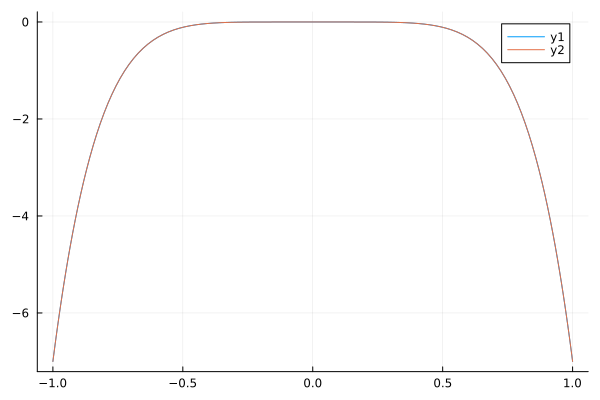

In [327]:
plot(x,D1*f)
plot!(x,dfexact)

### Solve a simple boundary value problem
Here, we seek the solution of

$$d^2 u/dx^2 = -1$$

subject to $u(-1) = 0$ and $u(1) = 0$. The exact solution is $u(x) = (1 - x^2)/2$

In [330]:
D1 = PseudoSpectral._construct_chebd1(Nx);
D2 = PseudoSpectral._construct_chebd2(Nx,D1);

In [400]:
A = copy(D2)

A[1,:] .= 0
A[1,1] = 1
#A[1,:] .= D1[1,:]

A[Nx+1,:] .= 0
A[Nx+1,Nx+1] = 1
#A[Nx+1,:] .= D1[Nx+1,:]

b = zeros(Nx+1)
b[2:Nx] .= -1;

In [401]:
u = A\b;

In [402]:
uex = (1 .- x.^2)/2;
#uex = 2*(1 .- 0.25*(x .- 1).^2);

In [403]:
norm(u-uex)

4.476315229459415e-13

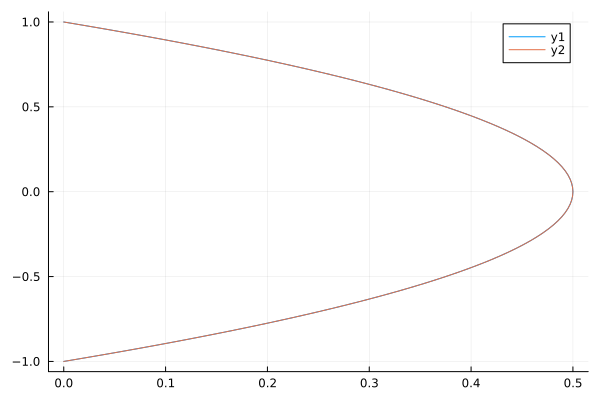

In [404]:
plot(u,x)
plot!(uex,x)